In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 
#for creating plots, customizing their appearance, and displaying them

In [52]:
data = pd.read_csv('/kaggle/input/datasetdiabetes/Diabetes Classification.csv', index_col=0)

In [53]:
data.head()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.2,0.9,2.4,1.4,46.0,4.7,0
1,26,M,23,3.7,1.4,1.1,2.1,62.0,4.5,0
2,33,M,21,4.9,1.0,0.8,2.0,46.0,7.1,0
3,45,F,21,2.9,1.0,1.0,1.5,24.0,2.3,0
4,50,F,24,3.6,1.3,0.9,2.1,50.0,2.0,0


In [54]:
data.shape

(5132, 10)

In [55]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Chol', 'TG', 'HDL', 'LDL', 'Cr', 'BUN',
       'Diagnosis'],
      dtype='object')

In [56]:
data.isnull()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5127,False,False,False,False,False,False,False,False,False,False
5128,False,False,False,False,False,False,False,False,False,False
5129,False,False,False,False,False,False,False,False,False,False
5130,False,False,False,False,False,False,False,False,False,False


In [58]:
data.describe()

,Age,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,14.048794,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,20.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,36.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,49.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,59.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,93.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


In [59]:
data['Diagnosis'].unique()

array([0, 1])

In [60]:
data['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [61]:
data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1, 'f': 1})

/tmp/ipykernel_33/1507084781.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'M': 0, 'F': 1, 'f': 1})


In [62]:
data['Gender'].unique()

array([1, 0])

In [63]:
data.describe()

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
count,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000,5132.000000
mean,48.950312,0.365549,24.613406,4.866882,1.719328,1.593305,2.914121,71.144800,4.896969,0.388348
std,14.048794,0.481631,4.277205,1.001052,1.327057,1.038849,0.945423,28.494394,1.689206,0.487422
min,20.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.300000,4.860753,0.500000,0.000000
25%,36.000000,0.000000,22.000000,4.190000,0.910000,1.090000,2.290000,58.000000,3.900000,0.000000
50%,49.000000,0.000000,24.000000,4.800000,1.380000,1.300000,2.790000,70.200000,4.720000,0.000000
75%,59.000000,1.000000,27.000000,5.460000,2.100000,1.590000,3.400000,81.600000,5.600000,1.000000
max,93.000000,1.000000,47.000000,11.650000,32.640000,9.900000,9.900000,800.000000,38.900000,1.000000


In [97]:
# Shuffling the DataFrame
shuffled_df = data.sample(frac=1.0, random_state=42)  # Setting random_state for reproducibility

# Reset the index after shuffling (not necessary)
shuffled_df.reset_index(drop=True, inplace=True)

In [65]:
shuffled_df

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,68,0,29,5.22,3.55,0.870000,2.460000,93.8,4.89,1
1,28,1,22,4.38,1.17,1.390000,1.870000,46.0,4.00,0
2,54,0,18,4.09,0.96,1.430000,2.500000,81.7,7.68,0
3,40,1,19,5.87,1.29,1.750000,3.370000,61.1,4.10,0
4,41,1,22,4.50,0.50,1.750000,1.940000,52.0,3.12,0
...,...,...,...,...,...,...,...,...,...,...
5127,58,0,27,4.98,2.48,4.860753,4.860753,68.3,6.24,1
5128,63,0,30,3.60,5.10,0.900000,2.500000,63.0,5.90,1
5129,40,0,16,4.00,0.00,1.000000,2.000000,67.0,4.00,0
5130,42,0,23,4.00,0.80,1.120000,2.460000,96.0,5.49,0


In [66]:
shuffled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5132 entries, 0 to 5131
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        5132 non-null   int64  
 1   Gender     5132 non-null   int64  
 2   BMI        5132 non-null   int64  
 3   Chol       5132 non-null   float64
 4   TG         5132 non-null   float64
 5   HDL        5132 non-null   float64
 6   LDL        5132 non-null   float64
 7   Cr         5132 non-null   float64
 8   BUN        5132 non-null   float64
 9   Diagnosis  5132 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 401.1 KB


In [67]:
shuffled_df.shape

(5132, 10)

In [68]:
X = shuffled_df.drop('Diagnosis', axis=1)

In [69]:
X

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN
0,68,0,29,5.22,3.55,0.870000,2.460000,93.8,4.89
1,28,1,22,4.38,1.17,1.390000,1.870000,46.0,4.00
2,54,0,18,4.09,0.96,1.430000,2.500000,81.7,7.68
3,40,1,19,5.87,1.29,1.750000,3.370000,61.1,4.10
4,41,1,22,4.50,0.50,1.750000,1.940000,52.0,3.12
...,...,...,...,...,...,...,...,...,...
5127,58,0,27,4.98,2.48,4.860753,4.860753,68.3,6.24
5128,63,0,30,3.60,5.10,0.900000,2.500000,63.0,5.90
5129,40,0,16,4.00,0.00,1.000000,2.000000,67.0,4.00
5130,42,0,23,4.00,0.80,1.120000,2.460000,96.0,5.49


In [71]:
X['Gender'].unique()

array([0, 1])

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [73]:
X_scaled

array([[ 1.35609823, -0.7590567 ,  1.02567475, ..., -0.48038264,
         0.79515315, -0.00412605],
       [-1.49139872,  1.31742464, -0.61106742, ..., -1.10450272,
        -0.88253327, -0.53105222],
       [ 0.3594743 , -0.7590567 , -1.54634867, ..., -0.43806941,
         0.37046684,  1.64769866],
       ...,
       [-0.63714964, -0.7590567 , -2.01398929, ..., -0.96698474,
        -0.14547438, -0.53105222],
       [-0.49477479, -0.7590567 , -0.37724711, ..., -0.48038264,
         0.87236885,  0.35110507],
       [ 2.06797247, -0.7590567 ,  0.09039351, ...,  0.61976123,
         0.35993743, -0.35343666]])

In [74]:
y = shuffled_df['Diagnosis']

In [75]:
y.unique()

array([1, 0])

In [76]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
# splitting the data into training set and testing set

In [79]:
X_train

array([[ 0.64422399, -0.7590567 , -0.37724711, ..., -0.01493715,
         0.45119234,  0.37478714],
       [ 0.50184914, -0.7590567 ,  0.09039351, ...,  0.03795438,
         0.68634922,  0.4576744 ],
       [ 0.0747246 , -0.7590567 , -0.61106742, ..., -0.26881651,
         0.38099625, -0.91588593],
       ...,
       [-0.21002509,  1.31742464, -0.37724711, ...,  0.13315914,
        -0.28586655, -0.73234985],
       [-1.06427418, -0.7590567 , -0.1434268 , ...,  1.79395325,
         0.64774138,  0.0136355 ],
       [-0.13883767, -0.7590567 ,  0.79185444, ..., -0.16303345,
        -0.55963128,  0.04915861]])

In [80]:
y_train

1724    0
2524    0
3479    0
1107    0
3360    0
       ..
2510    0
1211    1
1831    0
2642    0
2404    0
Name: Diagnosis, Length: 4105, dtype: int64

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
model =  LogisticRegression(max_iter=4105)
model.fit(X_train, y_train)

LogisticRegression(max_iter=4105)

In [83]:
 y_pred = model.predict(X_test)

In [84]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) # calculating accuracy score

In [96]:
print(accuracy*100)

81.3047711781889


In [87]:
model.predict([[50,1,24,4.2,0.9,2.4,1.4,46,4.7]]) # testing values

array([1])

In [88]:

model.predict([[55,0,30,5.1,3.5,1.7,1.8,48,4.6]]) # testing values

array([1])

 # **Understanding the data**

In [103]:
import seaborn as sns
correlations = X.corr()

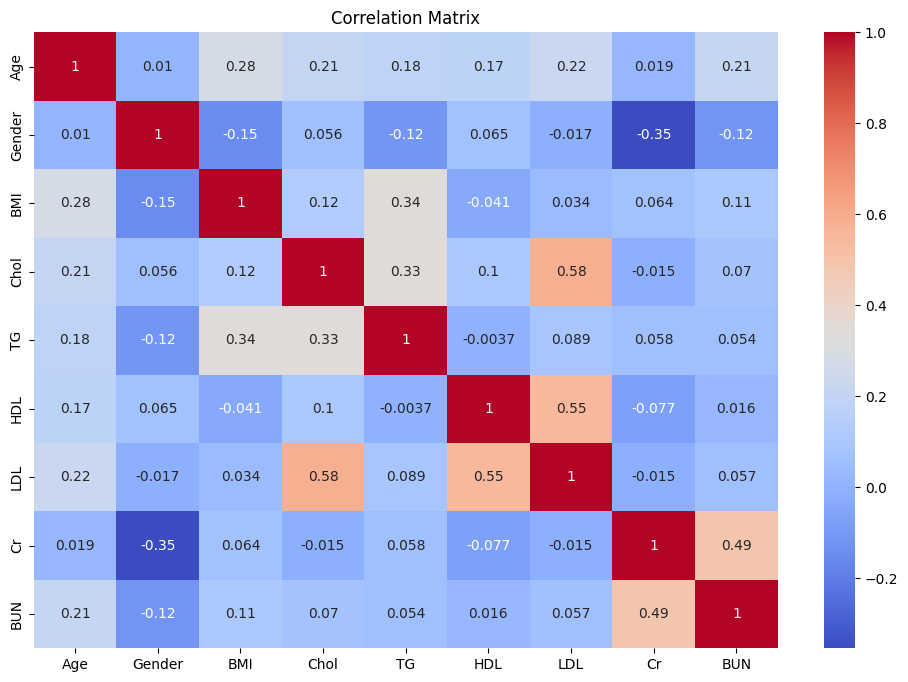

In [104]:
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Chol'}>, <Axes: title={'center': 'TG'}>,
        <Axes: title={'center': 'HDL'}>],
       [<Axes: title={'center': 'LDL'}>, <Axes: title={'center': 'Cr'}>,
        <Axes: title={'center': 'BUN'}>]], dtype=object)

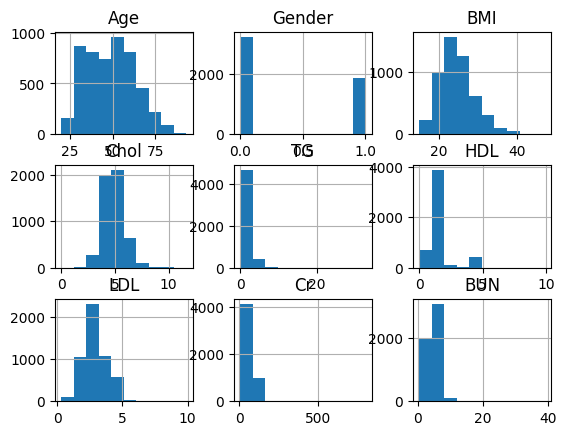

In [108]:
X.hist()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


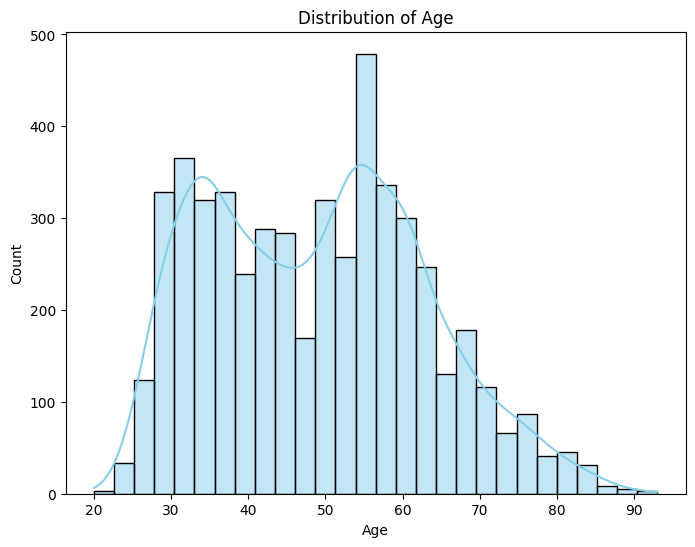

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


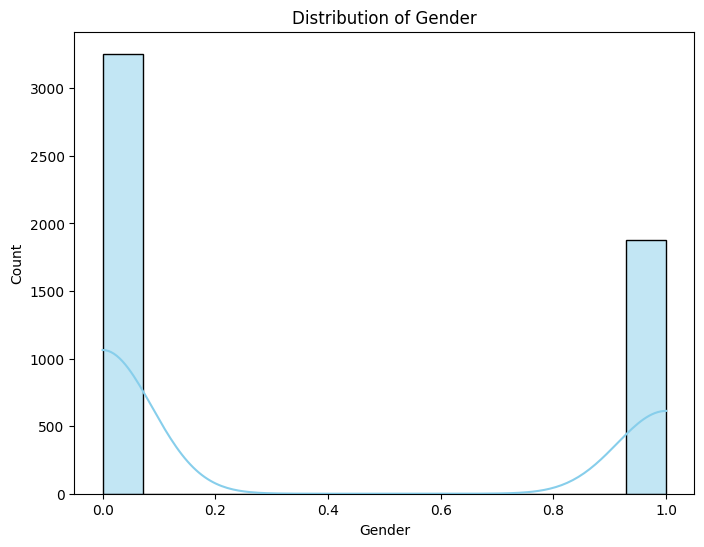

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


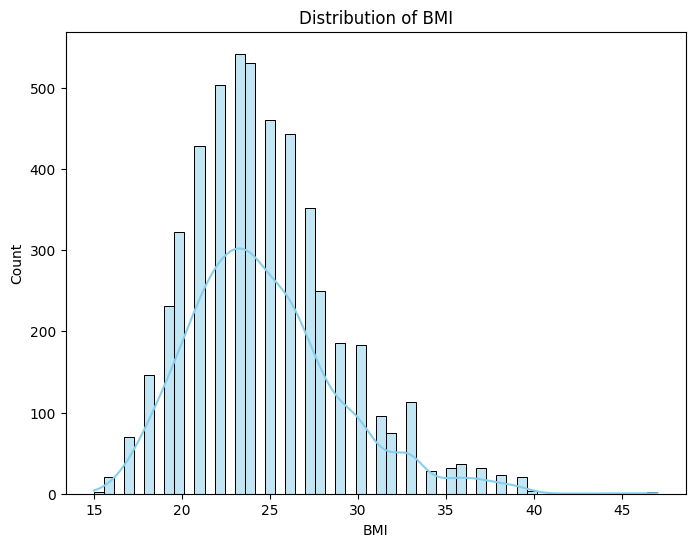

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


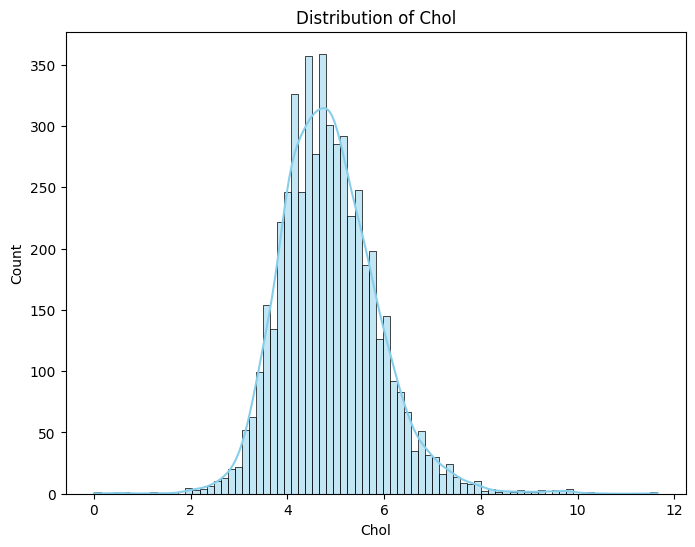

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


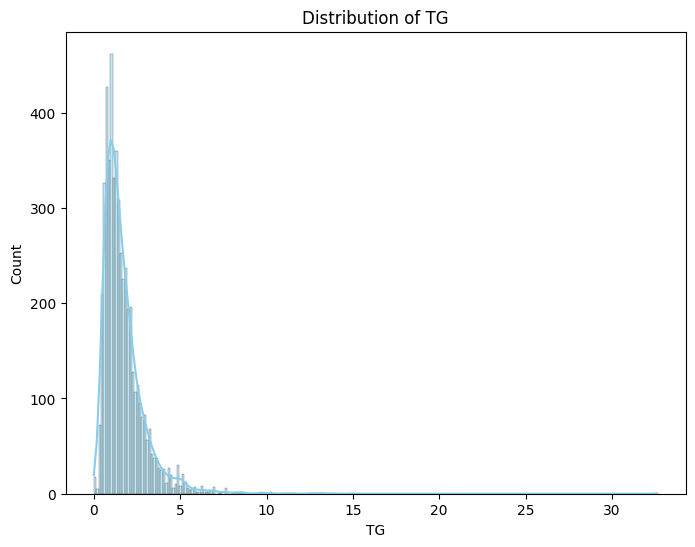

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


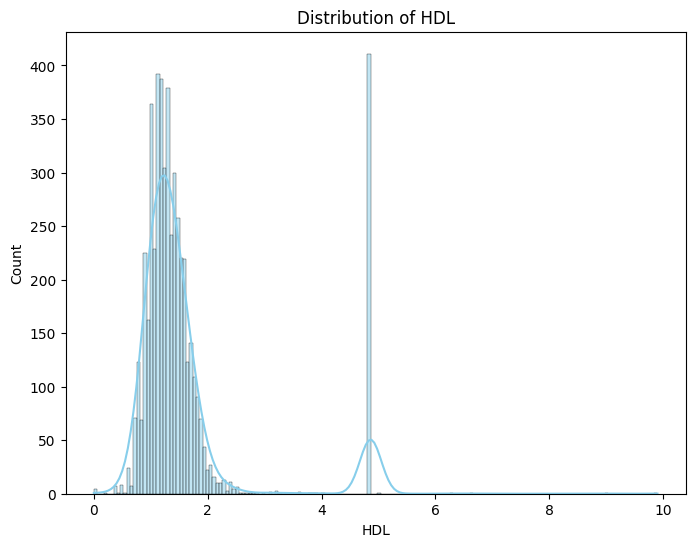

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


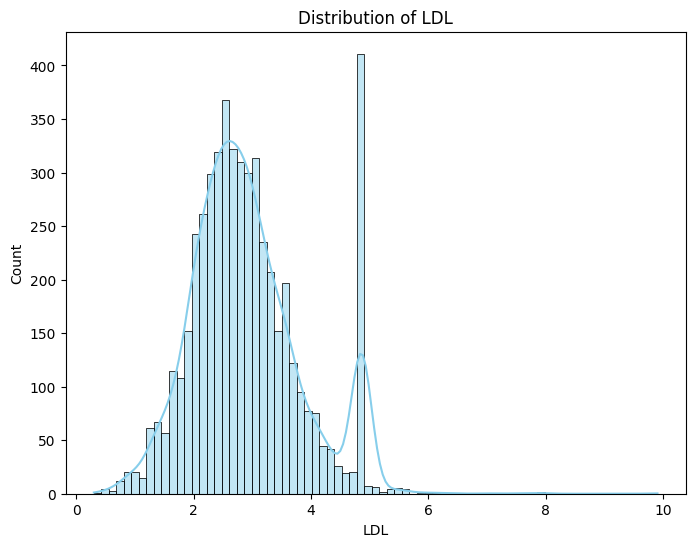

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


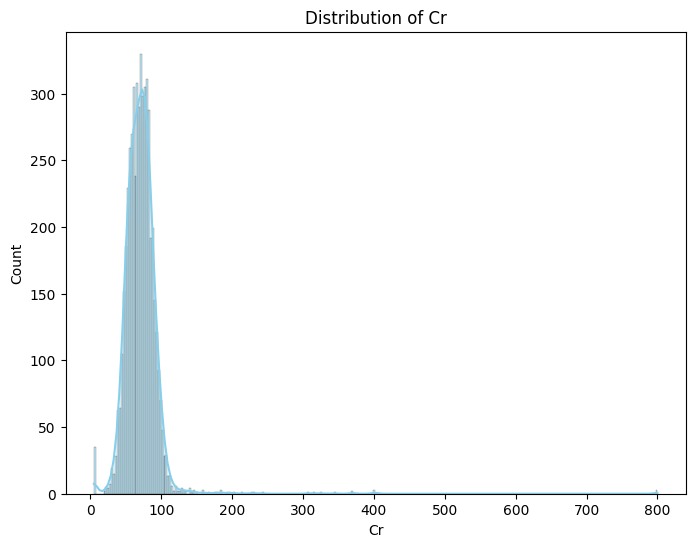

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


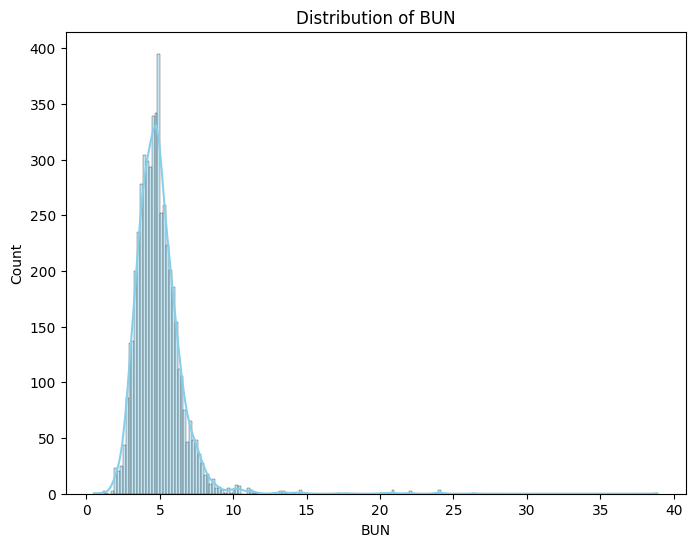

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


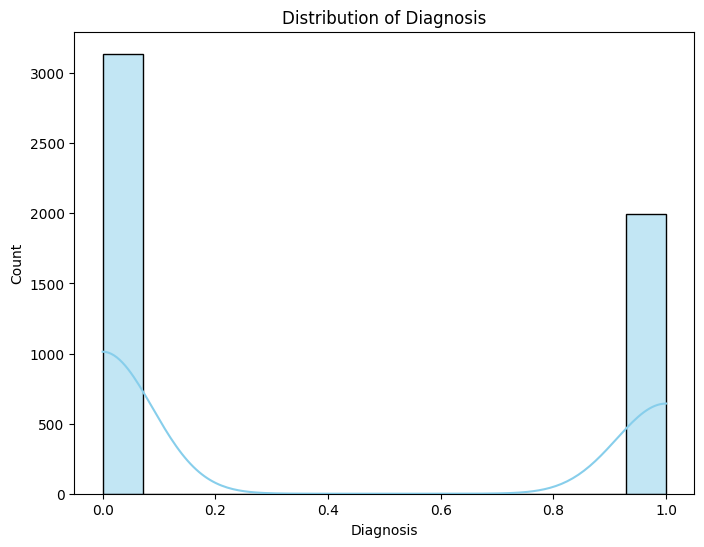

In [107]:
for column in shuffled_df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(shuffled_df[column], kde=True, color='skyblue')
    plt.title('Distribution of {}'.format(column))
    plt.show()

In [89]:
import pickle

In [90]:
pickle.dump(model,open('master_model.pkl','wb')) # to export model from deployment